In [1]:
#Importacion de librerias y configuraciones generales
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

plt.style.use('default') 
sns.set(style="whitegrid")
pd.options.display.float_format = '{:20,.2f}'.format

import warnings
warnings.filterwarnings('ignore')

In [2]:
#Lectura del archivo con los datos
tp1_data =  pd.read_csv('Datos/train.csv')

In [3]:
tp1_data.shape

(240000, 23)

In [4]:
tp1_data.size

5520000

In [5]:
tp1_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 240000 entries, 0 to 239999
Data columns (total 23 columns):
id                            240000 non-null int64
titulo                        234613 non-null object
descripcion                   238381 non-null object
tipodepropiedad               239954 non-null object
direccion                     186928 non-null object
ciudad                        239628 non-null object
provincia                     239845 non-null object
antiguedad                    196445 non-null float64
habitaciones                  217529 non-null float64
garages                       202235 non-null float64
banos                         213779 non-null float64
metroscubiertos               222600 non-null float64
metrostotales                 188533 non-null float64
idzona                        211379 non-null float64
lat                           116512 non-null float64
lng                           116512 non-null float64
fecha                         240

In [6]:
tp1_data.head(n=3)

,id,titulo,descripcion,tipodepropiedad,direccion,ciudad,provincia,antiguedad,habitaciones,garages,...,idzona,lat,lng,fecha,gimnasio,usosmultiples,piscina,escuelascercanas,centroscomercialescercanos,precio
0,254099,depto. tipo a-402,"depto. interior de 80.15m2, consta de sala com...",Apartamento,Avenida Division del Norte 2005,Benito Juárez,Distrito Federal,nan,2.00,1.00,...,"23,533.00",nan,nan,2015-08-23 00:00:00,0.00,0.00,0.00,0.00,0.00,"2,273,000.00"
1,53461,condominio horizontal en venta,"<p>entre sonora y guerrero, atr&aacute;s del h...",Casa en condominio,AV. MEXICO,La Magdalena Contreras,Distrito Federal,10.00,3.00,2.00,...,"24,514.00",19.31,-99.23,2013-06-28 00:00:00,0.00,0.00,0.00,1.00,1.00,"3,600,000.00"
2,247984,casa en venta urbi 3 recamaras tonala,descripcion \nla mejor ubicacion residencial e...,Casa,Urbi Tonala,Tonalá,Jalisco,5.00,3.00,2.00,...,"48,551.00",nan,nan,2015-10-17 00:00:00,0.00,0.00,0.00,0.00,0.00,"1,200,000.00"


In [7]:
tp1_data["tipodepropiedad"].value_counts()

Casa                             141717
Apartamento                       57341
Casa en condominio                19297
Terreno                            9945
Local Comercial                    3055
Oficina comercial                  1741
Bodega comercial                   1406
Edificio                           1396
Terreno comercial                  1326
Casa uso de suelo                   708
Quinta Vacacional                   395
Duplex                              343
Villa                               340
Inmuebles productivos urbanos       200
Rancho                              170
Local en centro comercial           165
Departamento Compartido             141
Otros                               134
Nave industrial                      76
Terreno industrial                   31
Huerta                               20
Lote                                  5
Hospedaje                             1
Garage                                1
Name: tipodepropiedad, dtype: int64

Text(0, 0.5, 'Ciudad')

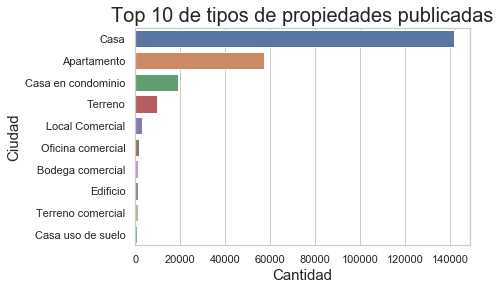

In [12]:
tipo_grafico_data = tp1_data['tipodepropiedad'].value_counts()[:10]
g = sns.barplot(x=tipo_grafico_data.values, y=tipo_grafico_data.index, orient='h')
g.set_title(u"Top 10 de tipos de propiedades publicadas", fontsize=20)
g.set_xlabel(u"Cantidad", fontsize=15)
g.set_ylabel(u"Ciudad", fontsize=15)

In [27]:
tp1_data["provincia"].value_counts()

Distrito Federal         58790
Edo. de México           41607
Jalisco                  21238
Querétaro                16988
Nuevo León               15324
Puebla                   10421
San luis Potosí           8447
Yucatán                   7928
Morelos                   7337
Veracruz                  5762
Quintana Roo              4756
Chihuahua                 4590
Coahuila                  3695
Baja California Norte     3220
Sonora                    2988
Guanajuato                2860
Guerrero                  2678
Hidalgo                   2521
Michoacán                 2471
Tamaulipas                2303
Durango                   2275
Sinaloa                   1806
Aguascalientes            1753
Baja California Sur       1700
Nayarit                   1352
Chiapas                   1126
Colima                    1008
Tabasco                    994
Tlaxcala                   839
Oaxaca                     711
Campeche                   263
Zacatecas                   94
Name: pr

Text(0, 0.5, 'Ciudad')

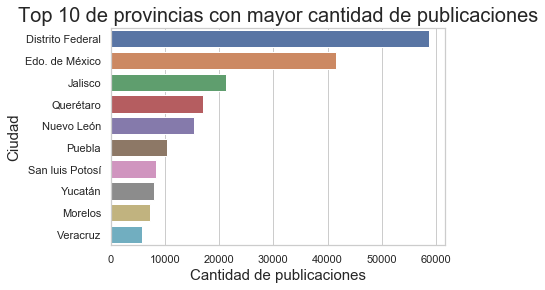

In [28]:
provincias_grafico_data = tp1_data['provincia'].value_counts()[:10]
g = sns.barplot(x=provincias_grafico_data.values, y=provincias_grafico_data.index, orient='h')
g.set_title(u"Top 10 de provincias con mayor cantidad de publicaciones", fontsize=20)
g.set_xlabel(u"Cantidad de publicaciones", fontsize=15)
g.set_ylabel(u"Ciudad", fontsize=15)

In [29]:
tp1_data["ciudad"].value_counts()

Querétaro                12646
Benito Juárez            11014
Zapopan                  10360
San Luis Potosí           7925
Mérida                    7162
Monterrey                 6946
Alvaro Obregón            6633
Cuauhtémoc                6614
Naucalpan de Juárez       6554
Miguel Hidalgo            5795
Atizapán de Zaragoza      5783
Tlalpan                   5721
Huixquilucan              5718
Coyoacán                  5293
Puebla                    4636
Guadalajara               4006
San Andrés Cholula        3805
Cancún                    3779
Cuernavaca                3775
Chihuahua                 3757
Tlalnepantla de Baz       3588
Cuautitlán Izcalli        3408
Tlajomulco de Zúñiga      3254
Gustavo A. Madero         3141
Iztapalapa                3093
Cuajimalpa de Morelos     3020
Tijuana                   2863
Hermosillo                2590
Acapulco de Juárez        2454
Ecatepec de Morelos       2159
                         ...  
Santa Ana Nopalucan          1
Almoloya

Text(0, 0.5, 'Ciudad')

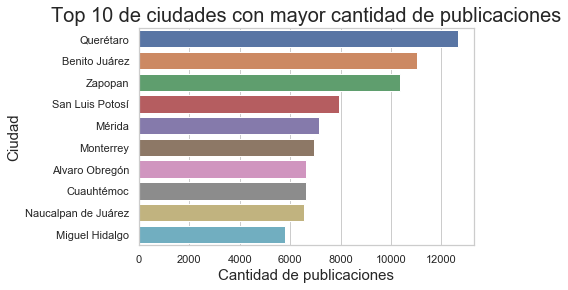

In [30]:
ciudades_grafico_data = tp1_data['ciudad'].value_counts()[:10]
g = sns.barplot(x=ciudades_grafico_data.values, y=ciudades_grafico_data.index, orient='h')
g.set_title(u"Top 10 de ciudades con mayor cantidad de publicaciones", fontsize=20)
g.set_xlabel(u"Cantidad de publicaciones", fontsize=15)
g.set_ylabel(u"Ciudad", fontsize=15)

Text(0, 0.5, 'Ciudad')

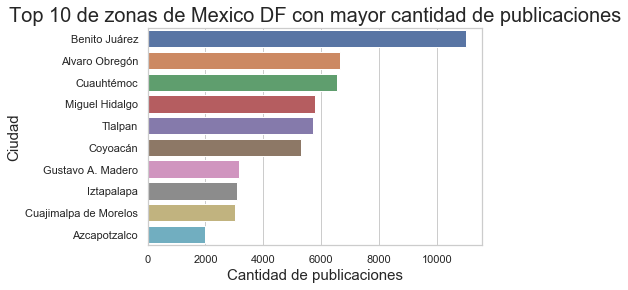

In [34]:
ciudades_df_grafico_data = tp1_data.loc[tp1_data['provincia'] == 'Distrito Federal']
ciudades_df_grafico_data = ciudades_df_grafico_data['ciudad'].value_counts()[:10]
g = sns.barplot(x=ciudades_df_grafico_data.values, y=ciudades_df_grafico_data.index, orient='h')
g.set_title(u"Top 10 de zonas de Mexico DF con mayor cantidad de publicaciones", fontsize=20)
g.set_xlabel(u"Cantidad de publicaciones", fontsize=15)
g.set_ylabel(u"Ciudad", fontsize=15)

Text(0, 0.5, 'Ciudad')

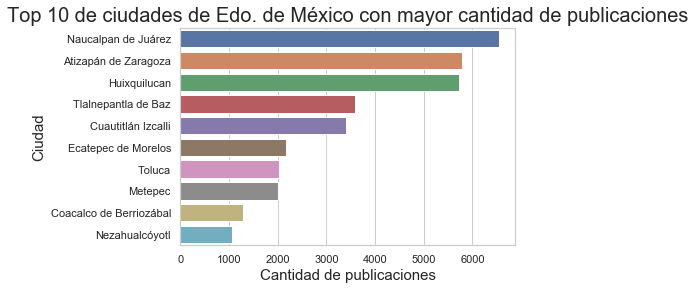

In [36]:
ciudades_edo_grafico_data = tp1_data.loc[tp1_data['provincia'] == 'Edo. de México']
ciudades_edo_grafico_data = ciudades_edo_grafico_data['ciudad'].value_counts()[:10]
g = sns.barplot(x=ciudades_edo_grafico_data.values, y=ciudades_edo_grafico_data.index, orient='h')
g.set_title(u"Top 10 de ciudades de Edo. de México con mayor cantidad de publicaciones", fontsize=20)
g.set_xlabel(u"Cantidad de publicaciones", fontsize=15)
g.set_ylabel(u"Ciudad", fontsize=15)